In [51]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [52]:
data = []
labels = []

for obj_id in tqdm(range(1, 101), desc="Object Loop"):
    for angle in tqdm(range(0, 360, 5), desc="Angle Loop", leave=False):
        filename = f"obj{obj_id}__{angle}.png"
        filepath = os.path.join(f"./Data/coil-100/{filename}")
        # print(filepath)
        img = cv2.imread(filepath)
        img = cv2.resize(img, (64, 64))  # Resize if needed
        img = img / 255.0  # Normalize
        data.append(img)
        labels.append(obj_id - 1)

data = np.array(data)
labels = np.array(labels)

Object Loop: 100%|██████████| 100/100 [00:06<00:00, 16.44it/s]


In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

In [54]:
y_train_cat = to_categorical(y_train, 100)
y_test_cat = to_categorical(y_test, 100)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

e:\StorageCloud\OneDrive\Документы\GitHub\IntelOb\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.3030 - loss: 3.1301 - val_accuracy: 0.8611 - val_loss: 0.4502
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9210 - loss: 0.2756 - val_accuracy: 0.9609 - val_loss: 0.1831
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9826 - loss: 0.0781 - val_accuracy: 0.9922 - val_loss: 0.0324
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.9956 - loss: 0.0235 - val_accuracy: 0.9896 - val_loss: 0.0314
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.9961 - loss: 0.0207 - val_accuracy: 0.9583 - val_loss: 0.1773
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.9803 - loss: 0.0804 - val_accuracy: 0.9948 - val_loss: 0.0222
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9991 - val_loss: 0.0073
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 1.0000 - loss: 6.3585e-04 - val_

In [56]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {accuracy:.2f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9993 - loss: 0.0058
Test accuracy: 1.00


In [57]:
def display_history(history, names, title):
    plt.title(title)
    plt.plot(history.history[names[0]], label=names[0])
    plt.plot(history.history[names[1]], label=names[1])
    plt.xlabel("Epochs")
    plt.ylabel(names[0])
    plt.legend()

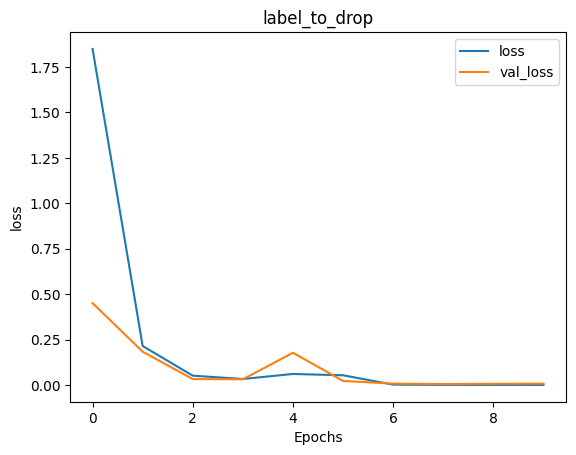

In [58]:
display_history(history, ['loss', 'val_loss'], "label_to_drop")

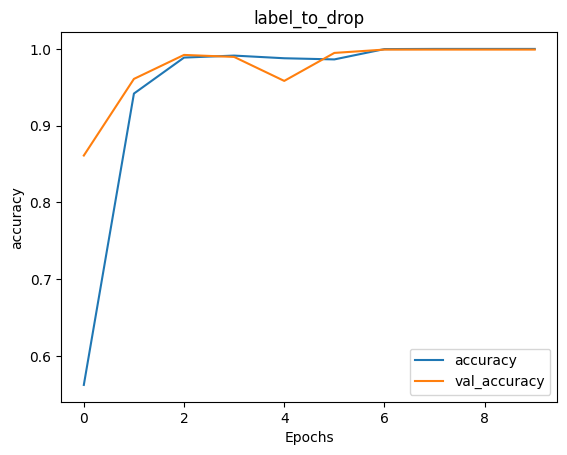

In [59]:
display_history(history, ['accuracy', 'val_accuracy'], "label_to_drop")

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


Text(0.5, 1.0, 'Predicted Object: 2 | Real Object: 2')

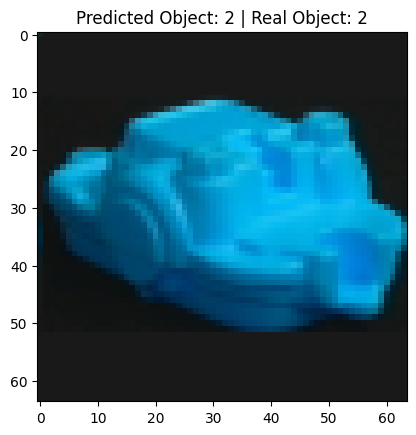

In [60]:
plt.imshow(X_test[0])
predictions = model.predict(X_test)
plt.title(f'Predicted Object: {np.argmax(predictions[0])} | Real Object: {y_test[0]}')